In [ ]:
from pix2code.model.classes.dataset.Dataset import Dataset
# analysis data using tensorboard

dataPath = "pix2code/datasets/pix2code_datasets/web/all_data"
dataset = Dataset()
dataset.load(dataPath, generate_binary_sequences=True)

In [ ]:
import numpy as np

In [ ]:
dic = dict()
for i, tok in enumerate(dataset.next_words):
    if dataset.ids[i] not in dic:
        dic[dataset.ids[i]] = tok.copy()
    else:
        dic[dataset.ids[i]] += tok
    # print(dataset.voc.token_lookup[np.argmax(tok)])

In [ ]:
labelCountMean = np.mean(np.array([v for v in dic.values()]), axis=0)
print(labelCountMean)

In [ ]:
import matplotlib.pyplot as plt

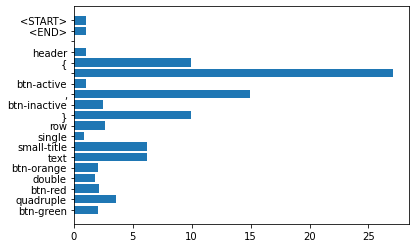

In [18]:
plt.barh(list(dataset.voc.token_lookup.values())[::-1], labelCountMean[::-1])
plt.show()


In [ ]:
# # javascript html 객체 중심 좌표
# # https://stackoverflow.com/questions/442404/retrieve-the-position-x-y-of-an-html-element
# from pix2code.compiler.classes.Compiler import *
# from pix2code.compiler.classes.Utils import *
# from pix2code.compiler.classes.DSLMapper import DSLMapper
# from pix2code.compiler.web_compiler import render_content_with_text

# dsl_path = 'pix2code/compiler/assets/class-group.json'
# dsl_mapper = DSLMapper(dsl_path)
# compiler = Compiler(dsl_mapper.get_dsl_mapping())

# for i, name in enumerate(dataset.ids):
#     dsl = f'{dataPath}/{name}.gui'
#     html = f'{dataPath}/{name}.html'
#     compiler.compile(dsl, html, rendering_function=render_content_with_text)


In [ ]:
print(dataset.ids)

In [12]:
from posixpath import abspath
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
import time, os

driver = webdriver.Chrome()

def getCenterPosition(driver, element):
    location = element.location
    size = element.size
    return (location['x'] + size['width'] / 2, location['y'] + size['height'] / 2)

htmls = [f for f in os.listdir(dataPath) if f.endswith('.html')]
# 태그별 중심 좌표 수집
centerPosData = dict()
for i, name in enumerate(htmls):
    html = os.path.join(dataPath, name)
    driver.get(abspath(html))
    time.sleep(1)
    
    # retrive center position
    elements = driver.find_elements(By.XPATH, '//*')
    for element in elements:
        center = getCenterPosition(driver, element)
        if center==(0, 0):
            continue
        if element.tag_name not in centerPosData:
            centerPosData[element.tag_name] = [center]
        else:
            centerPosData[element.tag_name].append(center)
        # print(element.tag_name, getCenterPosition(driver, element))
    # break
driver.close()

In [14]:
import json
with open('centerPosData.json', 'w') as f:
    json.dump(centerPosData, f)

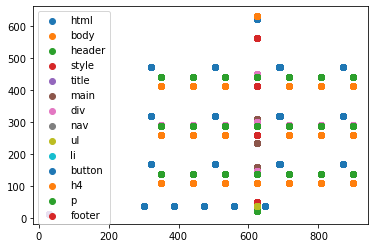

In [1]:
# import json
# with open('centerPosData.json', 'r') as f:
#     centerPosData = json.load(f)

# # 태그별 중심 좌표 분포
# import matplotlib.pyplot as plt
# import numpy as np

# for tag, pos in centerPosData.items():
#     pos = np.array(pos)
#     plt.scatter(pos[:, 0], pos[:, 1], label=tag)
# plt.legend()
# plt.show()


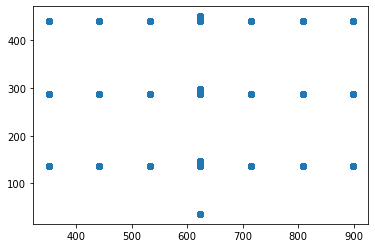

In [15]:
plt.scatter(*zip(*centerPosData['div']))

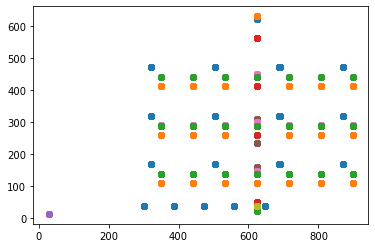

In [17]:
for posData in centerPosData:
    plt.scatter(*zip(*centerPosData[posData]))
plt.show()